#### Importing libraries.

In [9]:
import tensorflow as tf
from tensorflow.keras import layers
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
print('Imports Successful.')

Imports Successful.


#### Loading the dataset

In [26]:
X_train, Y_train, X_test, Y_test, X_dev, Y_dev = np.load('dataset.npy', allow_pickle=True)

In [37]:
X_train = np.float32(X_train / 255.0)
X_test = np.float32(X_test / 255.0)
X_dev = np.float32(X_dev / 255.0)

In [39]:
m = len(X_train)

print("Length of Training set:", m)
print("Length of Test set:", len(X_test))
print("Length of Dev set:", len(X_dev))
print()
print("Shape of training set:", X_train.shape)

Length of Training set: 4475
Length of Test set: 497
Length of Dev set: 0

Shape of training set: (4475, 128, 128)


In [42]:
def show_image(arr):
    plt.imshow(arr, 'gray')
    plt.show()

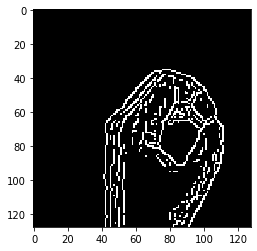

O


In [43]:
index = 8
show_image(X_train[index])
print(Y_train[index])